In [76]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pywaffle import Waffle
import plotly.express as px

In [77]:
#holidays_events table
df = pd.read_csv("C:/Users/Nada/Desktop/handeled_data/holidays_events.csv")
df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [79]:
df.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [80]:
print(df["type"].value_counts())

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64


In [81]:
print(df["locale"].unique())  
print(df["description"].nunique())

['Local' 'Regional' 'National']
103


In [82]:
train=pd.read_csv("C:/Users/Nada/Desktop/handeled_data/train_cleaned.csv")
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,False
1,1,2013-01-01,25,105574,1.0,False
2,2,2013-01-01,25,105575,2.0,False
3,3,2013-01-01,25,108079,1.0,False
4,4,2013-01-01,25,108701,1.0,False
...,...,...,...,...,...,...
499995,499995,2013-01-14,16,716241,6.0,False
499996,499996,2013-01-14,16,716242,5.0,False
499997,499997,2013-01-14,16,716245,2.0,False
499998,499998,2013-01-14,16,716250,4.0,False


In [83]:
print(train.columns)

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')


In [84]:
train.describe()

,id,store_nbr,item_nbr,unit_sales
count,500000.000000,500000.000000,5.000000e+05,500000.000000
mean,249999.500000,26.039392,6.164833e+05,9.375812
std,144337.711635,16.610870,3.031860e+05,20.530085
min,0.000000,1.000000,9.699500e+04,-149.000000
25%,124999.750000,10.000000,3.579630e+05,2.000000
50%,249999.500000,26.000000,5.870690e+05,5.000000
75%,374999.250000,43.000000,8.723100e+05,10.000000
max,499999.000000,54.000000,1.118683e+06,4021.000000


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           500000 non-null  int64  
 1   date         500000 non-null  object 
 2   store_nbr    500000 non-null  int64  
 3   item_nbr     500000 non-null  int64  
 4   unit_sales   500000 non-null  float64
 5   onpromotion  500000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 19.6+ MB


In [86]:
#items table
items = pd.read_csv("C:/Users/Nada/Desktop/handeled_data/items.csv")
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [87]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB


In [88]:
items.describe()

,item_nbr,class,perishable
count,4.100000e+03,4100.0000,4100.000000
mean,1.251436e+06,2169.6500,0.240488
std,5.876872e+05,1484.9109,0.427432
min,9.699500e+04,1002.0000,0.000000
25%,8.181108e+05,1068.0000,0.000000
50%,1.306198e+06,2004.0000,0.000000
75%,1.904918e+06,2990.5000,0.000000
max,2.134244e+06,7780.0000,1.000000


In [89]:
print(items.columns)

Index(['item_nbr', 'family', 'class', 'perishable'], dtype='object')


In [90]:
items.shape

(4100, 4)

In [91]:
items.isnull().sum()

item_nbr      0
family        0
class         0
perishable    0
dtype: int64

In [92]:
#oil table
oil = pd.read_csv("C:/Users/Nada/Desktop/handeled_data/oil_cleaned.csv")
oil.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [93]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [94]:
oil.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [95]:
print(oil.columns)

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')


In [96]:
sample_submission = pd.read_csv("C:/Users/Nada/Desktop/handeled_data/sample_submission.csv")
sample_submission.head()

,id,unit_sales
0,125497040,0
1,125497041,0
2,125497042,0
3,125497043,0
4,125497044,0


In [97]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 2 columns):
 #   Column      Dtype
---  ------      -----
 0   id          int64
 1   unit_sales  int64
dtypes: int64(2)
memory usage: 51.4 MB


In [98]:
sample_submission.describe()

,id,unit_sales
count,3.370464e+06,3370464.0
mean,1.271823e+08,0.0
std,9.729693e+05,0.0
min,1.254970e+08,0.0
25%,1.263397e+08,0.0
50%,1.271823e+08,0.0
75%,1.280249e+08,0.0
max,1.288675e+08,0.0


In [99]:
sample_submission.isnull().sum()

id            0
unit_sales    0
dtype: int64

In [100]:
sample_submission.shape

(3370464, 2)

In [101]:
sample_submission['unit_sales'].value_counts()

unit_sales
0    3370464
Name: count, dtype: int64

In [102]:
stores = pd.read_csv("C:/Users/Nada/Desktop/handeled_data/stores.csv")
stores.head()


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [103]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [104]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [105]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [106]:
print(stores.columns)

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')


In [107]:
test = pd.read_csv("C:/Users/Nada/Desktop/handeled_data/test.csv")
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           int64 
 1   date         object
 2   store_nbr    int64 
 3   item_nbr     int64 
 4   onpromotion  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 106.1+ MB


In [109]:
test.describe()

,id,store_nbr,item_nbr
count,3.370464e+06,3.370464e+06,3.370464e+06
mean,1.271823e+08,2.750000e+01,1.244798e+06
std,9.729693e+05,1.558579e+01,5.898362e+05
min,1.254970e+08,1.000000e+00,9.699500e+04
25%,1.263397e+08,1.400000e+01,8.053210e+05
50%,1.271823e+08,2.750000e+01,1.294665e+06
75%,1.280249e+08,4.100000e+01,1.730015e+06
max,1.288675e+08,5.400000e+01,2.134244e+06


In [110]:
transactions = pd.read_csv("C:/Users/Nada/Desktop/handeled_data/transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [111]:
transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [143]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
 3   year          83488 non-null  int32         
 4   month         83488 non-null  int32         
 5   day           83488 non-null  int32         
 6   day_of_week   83488 non-null  int32         
 7   is_weekend    83488 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(4), int64(2)
memory usage: 3.3 MB


In [112]:
product_sales = train.groupby('item_nbr')['unit_sales'].sum().reset_index()
product_sales_sorted = product_sales.sort_values(by='unit_sales', ascending=False)
print(product_sales_sorted)

      item_nbr  unit_sales
990     807493   49917.000
1422   1047679   46525.000
389     364606   39768.000
1016    819932   33166.000
712     584028   31730.105
...        ...         ...
1582   1105215       2.000
1603   1114566       2.000
1276    946277       2.000
528     464112       1.000
727     586423       1.000

[1607 rows x 2 columns]


In [113]:
# حساب إجمالي المبيعات لكل منتج
product_sales = train.groupby('item_nbr')['unit_sales'].sum().reset_index()
product_sales

,item_nbr,unit_sales
0,96995,59.0
1,103501,1562.0
2,103520,1101.0
3,103665,2020.0
4,105574,4051.0
...,...,...
1602,1113872,1284.0
1603,1114566,2.0
1604,1114567,15.0
1605,1114749,2033.0


In [114]:
# حساب متوسط بيع المنتجات 
mean_sales = product_sales['unit_sales'].mean()
# حساب الوسيط لمعدل بيع المنتجات
mode_sales = product_sales['unit_sales'].mode()[0]
# حساب الانحراف المعياري لمعدل بيع المنتجات
std_sales = product_sales['unit_sales'].std()
print(f"Mean Sales per Product: {mean_sales}")
print(f"Mode Sales per Product: {mode_sales}")
print(f"Standard Deviation of Sales per Product: {std_sales}")

Mean Sales per Product: 2917.178539514624
Mode Sales per Product: 78.0
Standard Deviation of Sales per Product: 4043.614820816025


In [115]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions['day_of_week'] = transactions['date'].dt.dayofweek


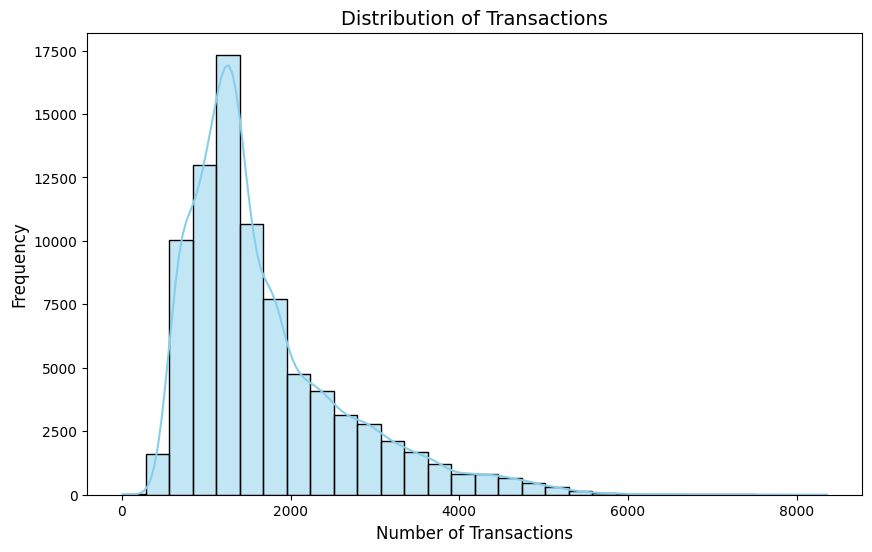

In [149]:
plt.figure(figsize=(10,6))
sns.histplot(transactions['transactions'], bins=30, kde=True,color='skyblue')

plt.title('Distribution of Transactions', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)



plt.show()

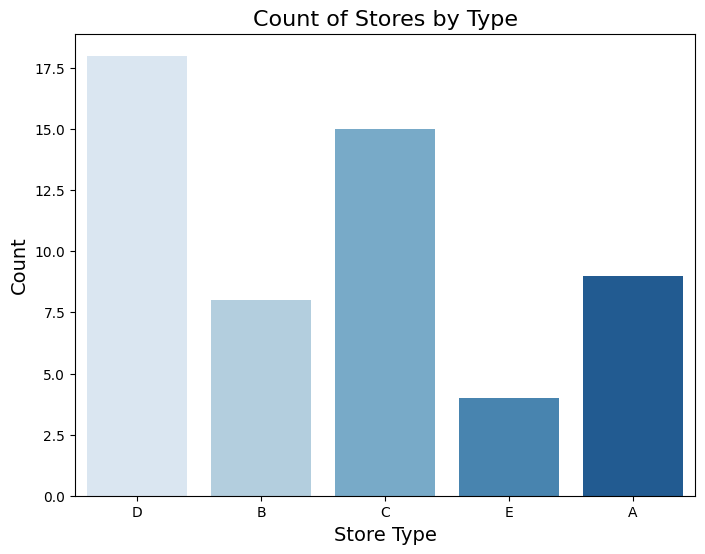

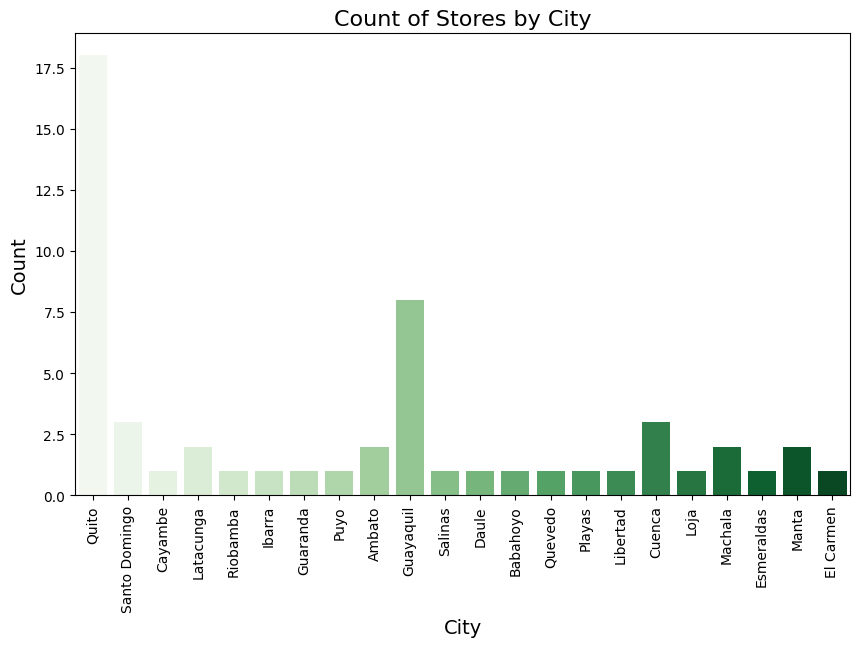

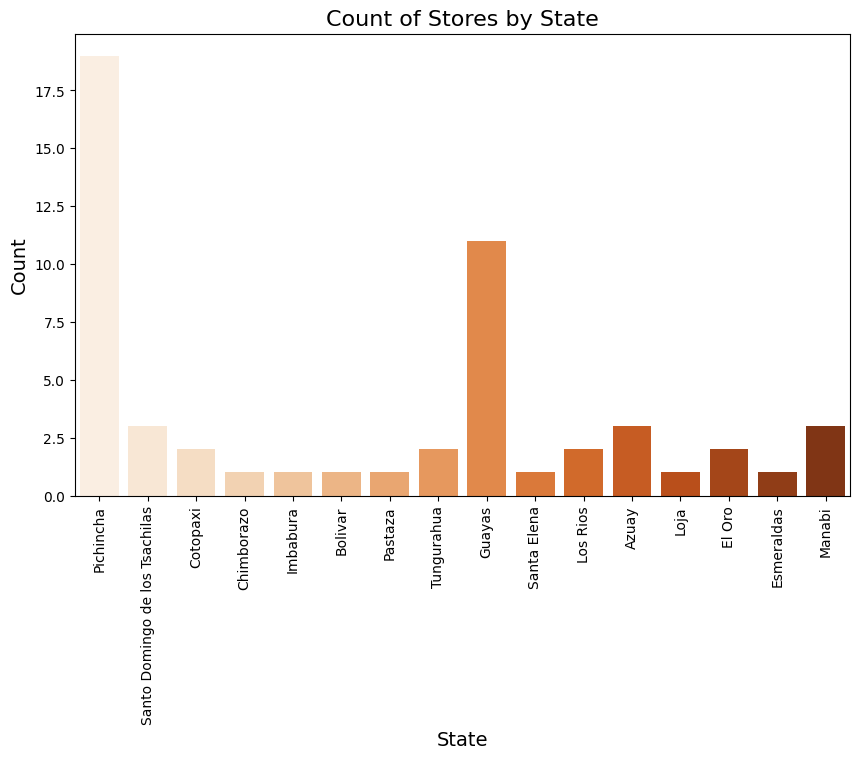

In [117]:
###count the NO.of stores by type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='type', data=stores, palette='Blues', legend=False)
plt.title('Count of Stores by Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

####count the NO.of stores by city
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='city', data=stores, palette='Greens', legend=False)
plt.xticks(rotation=90)  
plt.title('Count of Stores by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

####count the NO.of stores by state
plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='state', data=stores, palette='Oranges', legend=False)
plt.xticks(rotation=90)
plt.title('Count of Stores by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [118]:
#This function calculates the count of each category in a given categorical column of a DataFrame, 
# prints the count, and then plots a bar chart to visualize the distribution.
def get_different_categories(df,categorical_attribute):
    temp=df[categorical_attribute].value_counts()
    print(temp)
    temp.plot.bar() 

cluster
3     7
10    6
6     6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
2     2
9     2
7     2
12    1
16    1
5     1
17    1
Name: count, dtype: int64


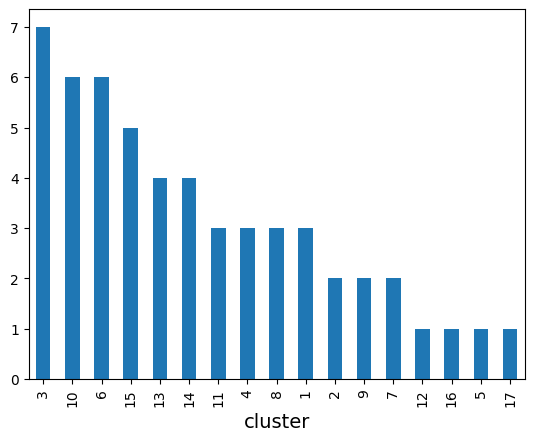

In [119]:
get_different_categories(stores,'cluster')

C:\Users\Nada\AppData\Local\Temp\ipykernel_7416\2414742164.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis",legend=False)


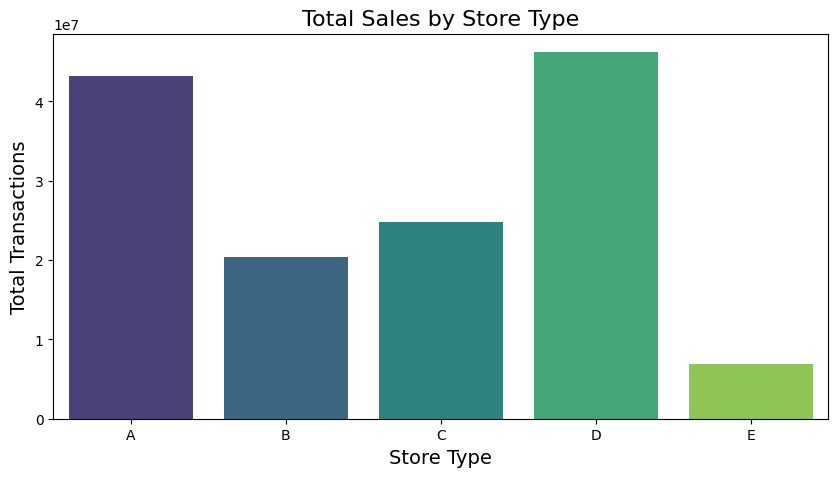

In [120]:

# Merge transactions data with store information
merged_df = transactions.merge(stores, on="store_nbr")
# Group transactions by store type and calculate total sales
store_sales = merged_df.groupby('type')['transactions'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis",legend=False)
plt.title("Total Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Total Transactions")
plt.show()

family
GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
LINGERIE                        20
AUTOMOTIVE                      20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES    

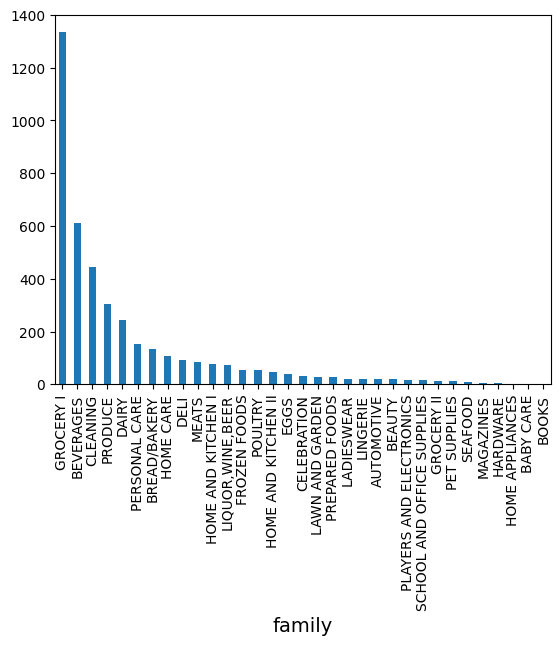

In [121]:
#count the No.of items in each category
get_different_categories(items,'family')

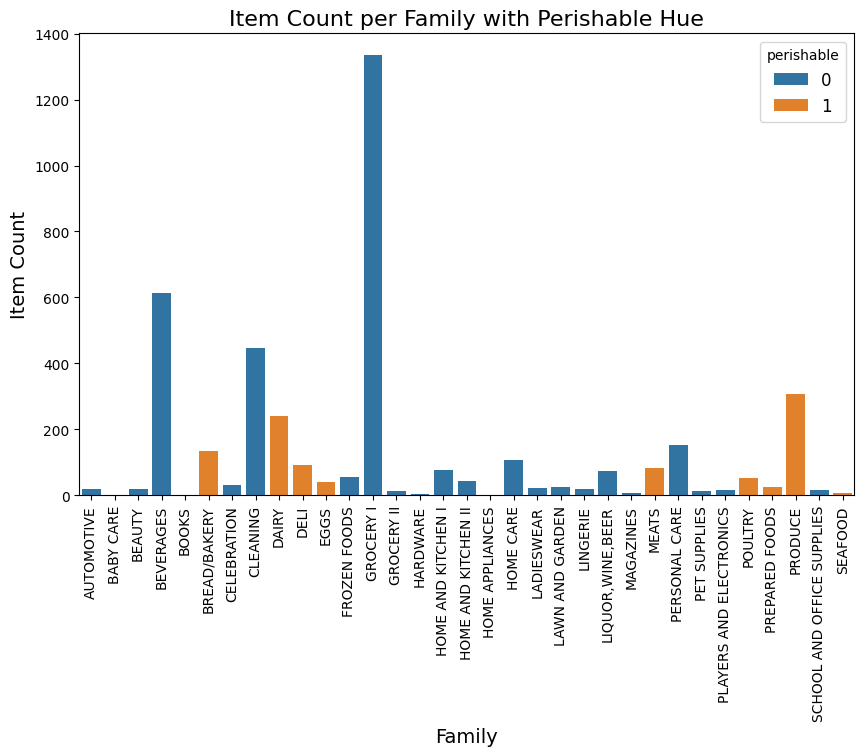

In [122]:
# Group the dataset by 'family' , 'perishable'and'item_nbr' columns
# Count the number of items and see if it is perishable or not
item_counts = items.groupby(['family', 'perishable'])['item_nbr'].count().reset_index(name='count')

# Create a Seaborn barplot
plt.figure(figsize=(10,6))
sns.barplot(data=item_counts, x='family', y='count', hue='perishable')

# Customize the plot
plt.title('Item Count per Family with Perishable Hue')
plt.xlabel('Family')
plt.ylabel('Item Count')
plt.xticks(rotation=90)
plt.show()

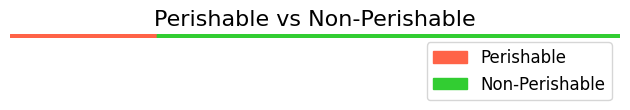

In [123]:
perishable_count = items[items['perishable'] == 1].shape[0]
non_perishable_count = items[items['perishable'] == 0].shape[0]

data = {
    'Perishable': perishable_count,
    'Non-Perishable': non_perishable_count
}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    title={'label': 'Perishable vs Non-Perishable', 'loc': 'center'},
    colors=['#FF6347', '#32CD32']  
)

plt.show()

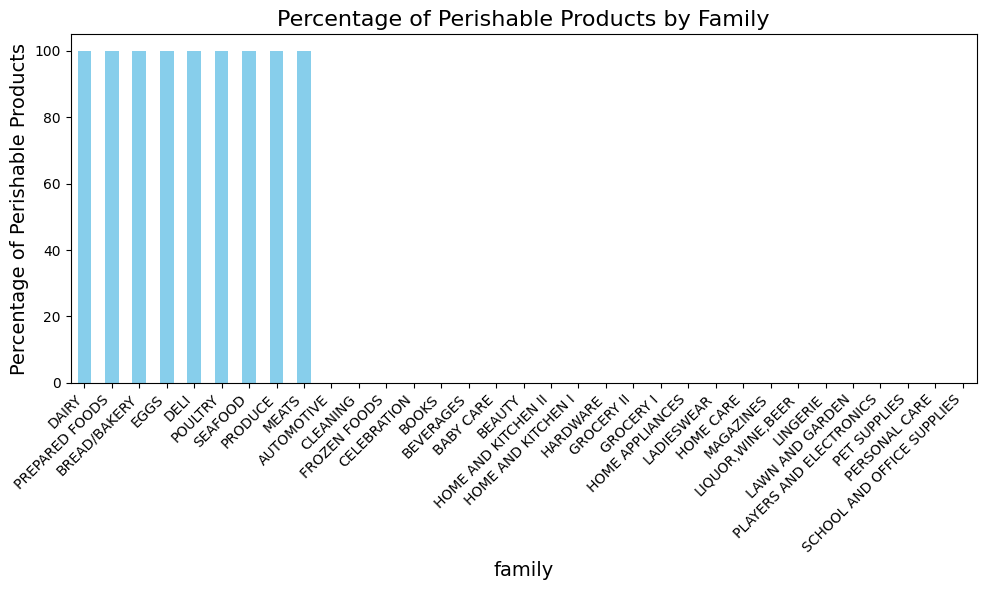

In [124]:
#caculate the percentage of perishable products by family
family_perishable = items.groupby('family')['perishable'].mean() * 100

plt.figure(figsize=(10, 6))
family_perishable.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Percentage of Perishable Products by Family')
plt.xlabel('family')
plt.ylabel('Percentage of Perishable Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

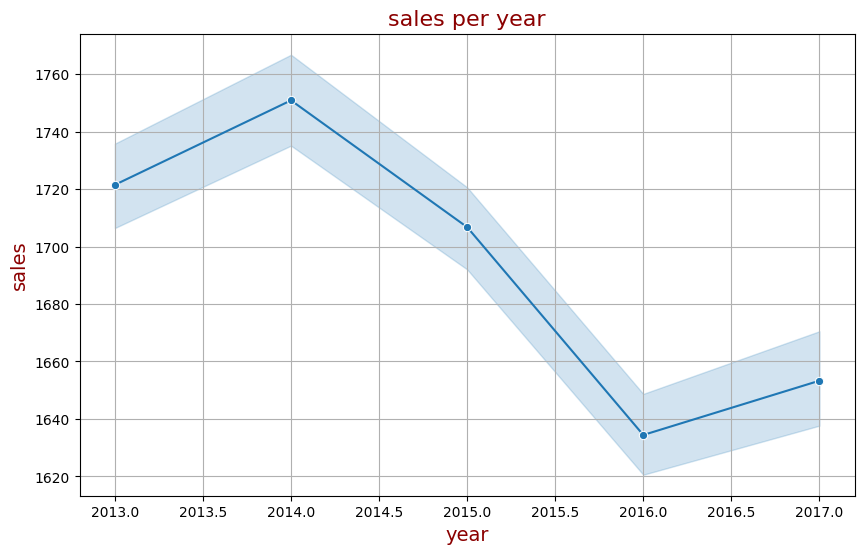

In [125]:
plt.figure(figsize=(10, 6))
#رسم خط الاتجاه بين السنه ونسبة المبيعات
sns.lineplot(x=transactions['year'], y=transactions['transactions'], marker='o')

plt.xlabel("year",color='darkred')
plt.ylabel("sales",color='darkred')
plt.title("sales per year",color='darkred')
plt.xticks(rotation=45)
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


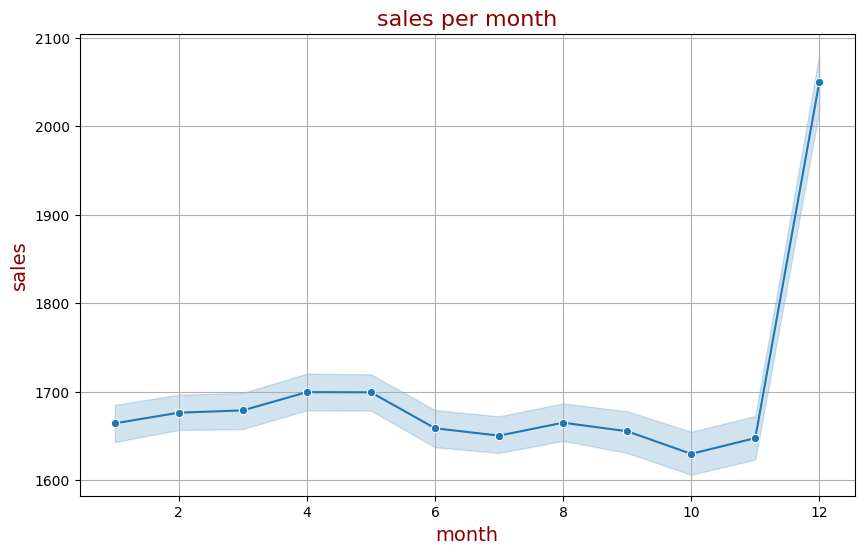

In [126]:
plt.figure(figsize=(10, 6))

# رسم خط الاتجاه بين الشهر ونسبة المبيعات
sns.lineplot(x=transactions['month'], y=transactions['transactions'], marker='o')

plt.xlabel("month",color='darkred')
plt.ylabel("sales",color='darkred')
plt.title("sales per month",color='darkred')
plt.xticks(rotation=0)
plt.grid(True)

plt.show()


In [127]:
#Groups the transactions DataFrame by the store_nbr column.
#Finds the maximum number of transactions for each store (store_nbr).
transactions.groupby('store_nbr')['transactions'].max()


store_nbr
1     3023
2     4060
3     6085
4     3589
5     3468
6     4256
7     3023
8     5261
9     4624
10    2242
11    5018
12    2363
13    1795
14    2510
15    2314
16    1861
17    3176
18    2623
19    2370
20    4500
21    3354
22    2412
23    2236
24    4353
25    3401
26    2184
27    2455
28    2498
29    2599
30    1443
31    3594
32    1497
33    2489
34    3636
35    1676
36    2586
37    3056
38    3577
39    2987
40    2263
41    2413
42    2368
43    2850
44    8359
45    7305
46    8001
47    7727
48    7044
49    6600
50    5456
51    3572
52    4209
53    2737
54    1811
Name: transactions, dtype: int64

In [128]:
avg_transactions_store_year = transactions.groupby(['store_nbr', 'year'])['transactions'].mean().reset_index()
print(avg_transactions_store_year)

     store_nbr  year  transactions
0            1  2013   1522.807163
1            1  2014   1538.082645
2            1  2015   1543.110497
3            1  2016   1503.486188
4            1  2017   1504.389381
..         ...   ...           ...
250         54  2013    878.419890
251         54  2014    878.763085
252         54  2015    885.630854
253         54  2016    851.497238
254         54  2017    816.747788

[255 rows x 3 columns]


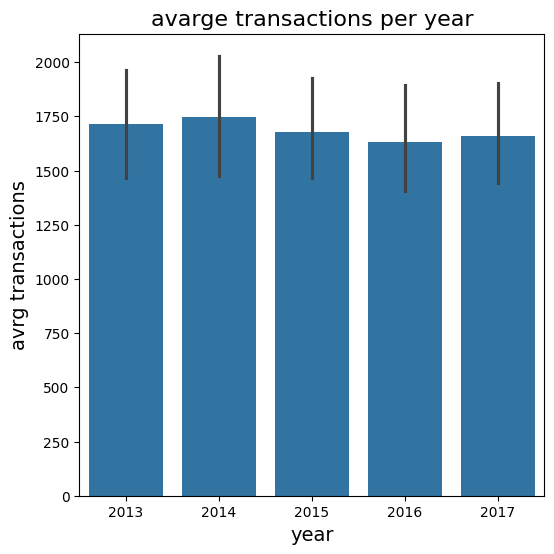

In [129]:
plt.figure(figsize=(6,6))
sns.barplot(avg_transactions_store_year,x='year',y='transactions')
plt.ylabel('avrg transactions',color='black')
plt.xlabel('year',color='black')
plt.title('avarge transactions per year',color='black')
plt.show()

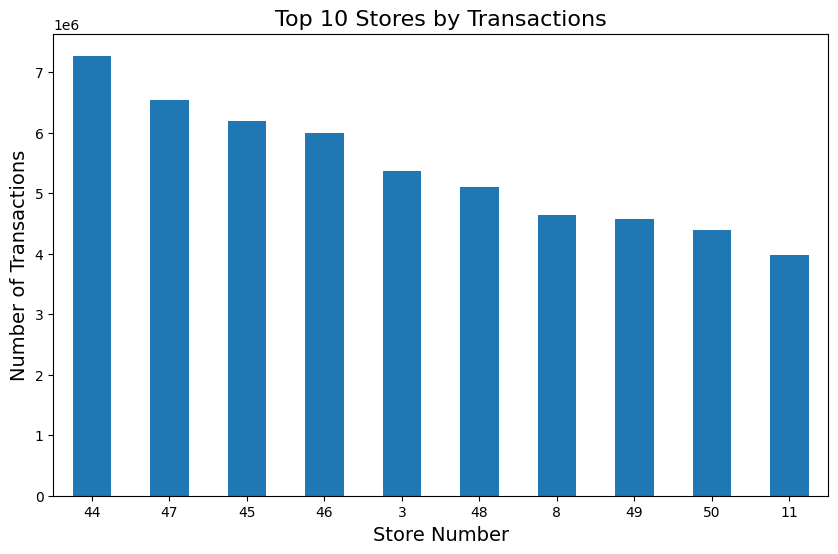

In [130]:
store_transactions = transactions.groupby('store_nbr')['transactions'].sum().sort_values(ascending=False)
top_stores = store_transactions.head(10)
plt.figure(figsize=(10,6))
top_stores.plot(kind='bar')
plt.title('Top 10 Stores by Transactions')
plt.xlabel('Store Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

In [131]:
print(stores.columns)

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')


In [132]:
print(transactions.columns)

Index(['date', 'store_nbr', 'transactions', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')


In [133]:
transaction_store=pd.merge(stores,transactions,on='store_nbr',how='inner')
transaction_store

,store_nbr,city,state,type,cluster,date,transactions,year,month,day,day_of_week
0,1,Quito,Pichincha,D,13,2013-01-02,2111,2013,1,2,2
1,1,Quito,Pichincha,D,13,2013-01-03,1833,2013,1,3,3
2,1,Quito,Pichincha,D,13,2013-01-04,1863,2013,1,4,4
3,1,Quito,Pichincha,D,13,2013-01-05,1509,2013,1,5,5
4,1,Quito,Pichincha,D,13,2013-01-06,520,2013,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...
83483,54,El Carmen,Manabi,C,3,2017-08-11,768,2017,8,11,4
83484,54,El Carmen,Manabi,C,3,2017-08-12,903,2017,8,12,5
83485,54,El Carmen,Manabi,C,3,2017-08-13,1054,2017,8,13,6
83486,54,El Carmen,Manabi,C,3,2017-08-14,818,2017,8,14,0


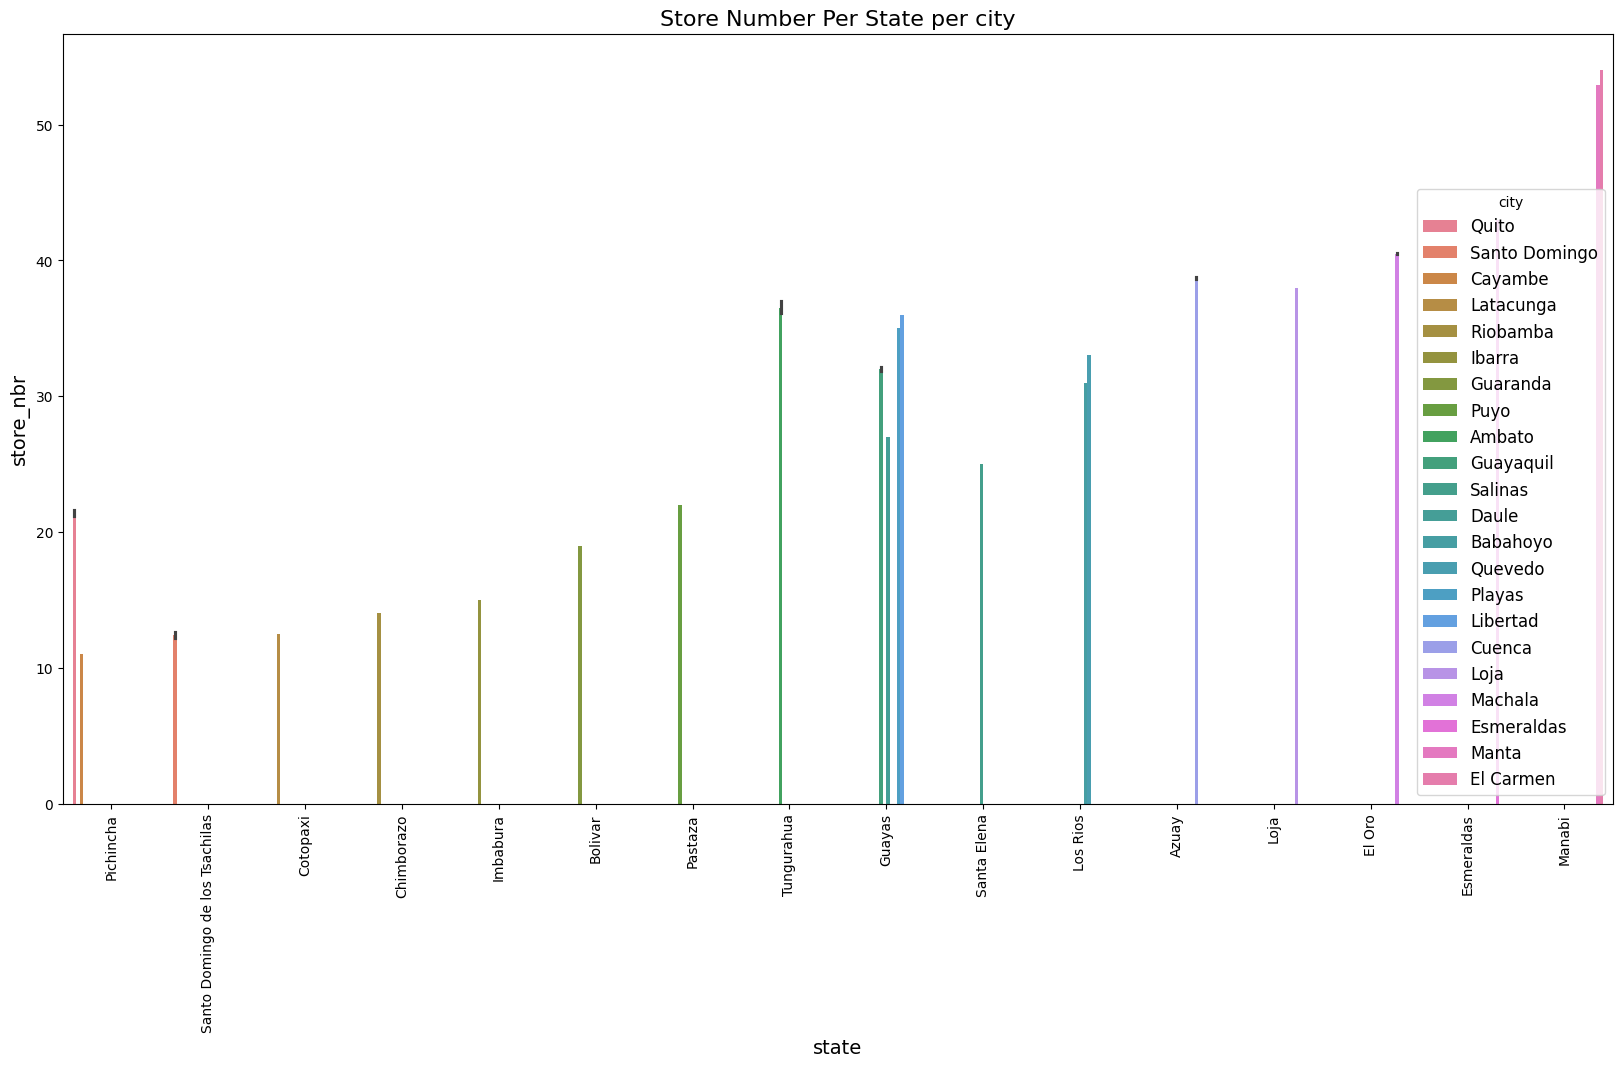

In [134]:
plt.figure(figsize=(20,10))
sns.barplot(transaction_store,x='state',y='store_nbr',hue='city')
plt.title('Store Number Per State per city')
sns.set_context(rc={"axes.labelsize": 14, "axes.titlesize": 16, "legend.fontsize": 12})
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

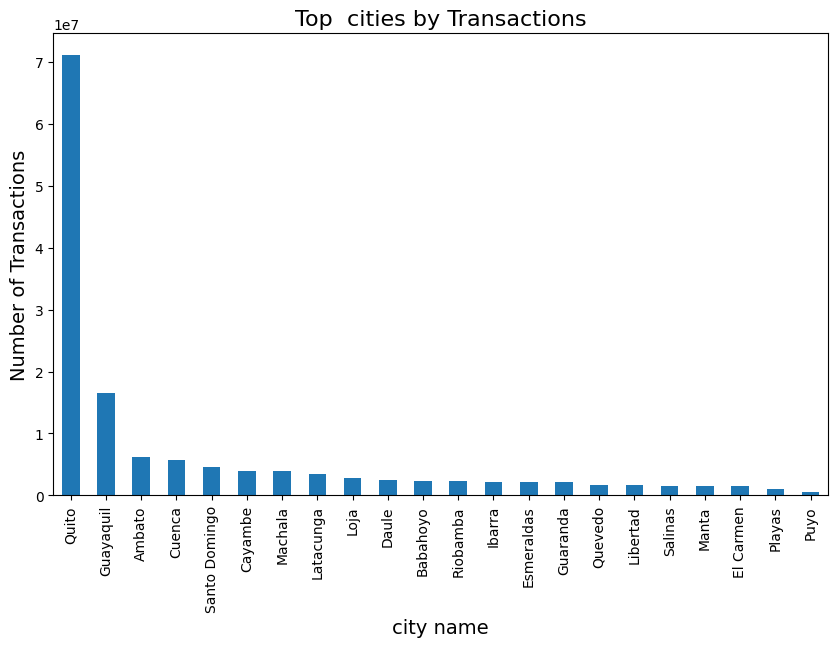

In [135]:
transaction_per_city=transaction_store.groupby('city')['transactions'].sum().sort_values(ascending=False)
top_cities=transaction_per_city
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar')
plt.title('Top  cities by Transactions',color='black')
plt.xlabel('city name',color='black')
plt.ylabel('Number of Transactions',color='black')
plt.xticks(rotation=90)
plt.show

In [142]:
# Group the 'stores' DataFrame by 'state' and count the number of unique stores in each state
stores_per_state = stores.groupby('state')['store_nbr'].nunique()
# Group the 'stores' DataFrame by 'state' and count the number of unique cities in each state
cities_per_state = stores.groupby('state')['city'].nunique()
# Group the 'stores' DataFrame by 'state' and get a list of unique city names in each state
cities_names_per_state = stores.groupby('state')['city'].unique()

summary = pd.DataFrame({
    'Number_of_Stores': stores_per_state,
    'Number_of_Cities': cities_per_state,
    'Cities': cities_names_per_state
})

print(summary)


                                Number_of_Stores  Number_of_Cities  \
state                                                                
Azuay                                          3                 1   
Bolivar                                        1                 1   
Chimborazo                                     1                 1   
Cotopaxi                                       2                 1   
El Oro                                         2                 1   
Esmeraldas                                     1                 1   
Guayas                                        11                 4   
Imbabura                                       1                 1   
Loja                                           1                 1   
Los Rios                                       2                 2   
Manabi                                         3                 2   
Pastaza                                        1                 1   
Pichincha           

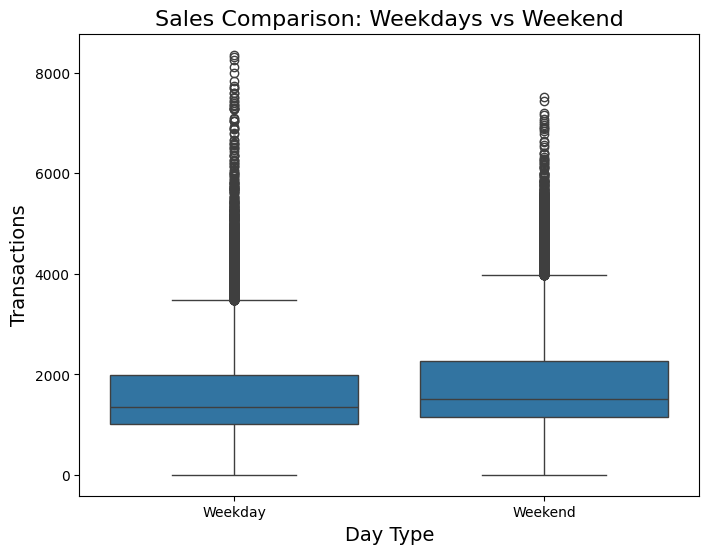

In [137]:
# Convert the 'date' column to a datetime format to enable date-based operations
transactions['date'] = pd.to_datetime(transactions['date'])
# Extract the day of the week from the 'date' column (0 = Monday, 6 = Sunday)
transactions['day_of_week'] = transactions['date'].dt.dayofweek
# Create a new column 'is_weekend' to indicate whether the day is a weekend (Saturday = 5, Sunday = 6)
transactions['is_weekend'] = transactions['day_of_week'].isin([5, 6])  

plt.figure(figsize=(8, 6))
# Create a box plot to compare transaction distributions on weekdays vs weekends
sns.boxplot(x='is_weekend', y='transactions', data=transactions)
# Rename x-axis labels for clarity (0 = Weekday, 1 = Weekend)
plt.xticks([0, 1], ['Weekday', 'Weekend'])

plt.title('Sales Comparison: Weekdays vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Transactions')
plt.show()